# Importar bibliotecas necesarias

In [171]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns


# Leer Geodataframe

In [172]:
csv_file = '2017_accidents_tipus_gu_bcn_.csv'
df = pd.read_csv(csv_file)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud))
gdf

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal_caption,Descripcio_dia_setmana,Dia_setmana,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,geometry
0,2017S009418,-1,Desconegut,-1,Desconegut,-1,Francesc Ferrer i Guàrdia / Sant Jordi ...,Desconegut,Dilluns,Dl,...,Novembre,13,16,Tarda,Abast,428572.07,4580031.06,2.144821,41.366779,POINT (2.14482 41.36678)
1,2017S008852,-1,Desconegut,-1,Desconegut,-1,Valldaura ...,284-286,Dijous,Dj,...,Octubre,26,7,Matí,Col.lisió fronto-lateral,431806.60,4588044.41,2.182588,41.439233,POINT (2.18259 41.43923)
2,2017S001023,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,NAVAS DE TOLOSA / Av Meridiana ...,0203 0205,Dimarts,Dm,...,Febrer,7,15,Tarda,Col.lisió lateral,432116.48,4585382.72,2.186591,41.415280,POINT (2.18659 41.41528)
3,2017S009198,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant / Ruiz de Padrón ...,0090 0090,Dimarts,Dm,...,Novembre,7,14,Tarda,Col.lisió fronto-lateral,431940.75,4585401.48,2.184483,41.415436,POINT (2.18448 41.41544)
4,2017S006546,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret ...,0330 0332,Dijous,Dj,...,Juliol,27,14,Tarda,Abast,431537.32,4585363.11,2.179666,41.415060,POINT (2.17967 41.41506)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004,2017S003667,9,Sant Andreu,59,el Bon Pastor,701266,Litoral (Llobregat) ...,140000,Dimarts,Dm,...,Abril,25,8,Matí,Col.lisió lateral,433866.55,4588278.91,2.207212,41.441509,POINT (2.20721 41.44151)
11005,2017S002192,9,Sant Andreu,59,el Bon Pastor,92938,POTOSÍ ...,0000 0000,Dissabte,Ds,...,Març,18,18,Tarda,Col.lisió fronto-lateral,433404.54,4587801.39,2.201735,41.437175,POINT (2.20174 41.43718)
11006,2017S001766,9,Sant Andreu,59,el Bon Pastor,81002,ARBECA ...,0039 0039,Divendres,Dv,...,Març,3,20,Tarda,Caiguda (dues rodes),433745.24,4587781.61,2.205818,41.437023,POINT (2.20582 41.43702)
11007,2017S009106,9,Sant Andreu,59,el Bon Pastor,295709,Sant Adrià ...,0135 0135,Dissabte,Ds,...,Novembre,4,7,Matí,Atropellament,433747.84,4587710.83,2.205850,41.436384,POINT (2.20585 41.43638)


# Calcular matriz de correlación

## Mostrar prueba de datos

In [173]:
gdf.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal_caption,Descripcio_dia_setmana,Dia_setmana,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,geometry
0,2017S009418,-1,Desconegut,-1,Desconegut,-1,Francesc Ferrer i Guàrdia / Sant Jordi ...,Desconegut,Dilluns,Dl,...,Novembre,13,16,Tarda,Abast,428572.07,4580031.06,2.144821,41.366779,POINT (2.14482 41.36678)
1,2017S008852,-1,Desconegut,-1,Desconegut,-1,Valldaura ...,284-286,Dijous,Dj,...,Octubre,26,7,Matí,Col.lisió fronto-lateral,431806.60,4588044.41,2.182588,41.439233,POINT (2.18259 41.43923)
2,2017S001023,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,NAVAS DE TOLOSA / Av Meridiana ...,0203 0205,Dimarts,Dm,...,Febrer,7,15,Tarda,Col.lisió lateral,432116.48,4585382.72,2.186591,41.415280,POINT (2.18659 41.41528)
3,2017S009198,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant / Ruiz de Padrón ...,0090 0090,Dimarts,Dm,...,Novembre,7,14,Tarda,Col.lisió fronto-lateral,431940.75,4585401.48,2.184483,41.415436,POINT (2.18448 41.41544)
4,2017S006546,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret ...,0330 0332,Dijous,Dj,...,Juliol,27,14,Tarda,Abast,431537.32,4585363.11,2.179666,41.415060,POINT (2.17967 41.41506)


## Matriz de correlación

In [174]:
corr = gdf.corr()
corr

,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
Codi_districte,1.000000,0.987637,0.159871,NaN,0.008895,-0.010874,-0.014116,0.440822,0.637332,0.011507,0.005310
Codi_barri,0.987637,1.000000,0.163730,NaN,0.011285,-0.012072,-0.014088,0.503770,0.611668,0.010855,0.005858
Codi_carrer,0.159871,0.163730,1.000000,NaN,0.059760,0.014360,-0.025352,0.088450,0.003130,-0.013342,0.005060
Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes_any,0.008895,0.011285,0.059760,NaN,1.000000,0.020487,-0.000820,0.025905,0.000643,0.003324,0.000141
Dia_mes,-0.010874,-0.012072,0.014360,NaN,0.020487,1.000000,0.012878,-0.018346,-0.007369,-0.003306,-0.013499
Hora_dia,-0.014116,-0.014088,-0.025352,NaN,-0.000820,0.012878,1.000000,-0.004796,0.013453,0.001704,0.018309
Coordenada_UTM_X,0.440822,0.503770,0.088450,NaN,0.025905,-0.018346,-0.004796,1.000000,0.408751,-0.003007,0.009063
Coordenada_UTM_Y,0.637332,0.611668,0.003130,NaN,0.000643,-0.007369,0.013453,0.408751,1.000000,0.009872,-0.003349
Longitud,0.011507,0.010855,-0.013342,NaN,0.003324,-0.003306,0.001704,-0.003007,0.009872,1.000000,-0.000282


# Máscara del triangulo superior

In [175]:
mask = np.zeros_like(corr, dtype=bool) ##No crea la mascara??
mask[np.triu_indices_from(mask)] = True

# Mapa de colores divergente personalizado

In [176]:
colorMap = sns.diverging_palette(220, 10, as_cmap=True)

# Mapa de calor con máscara y relación de aspecto correcta

<AxesSubplot:>

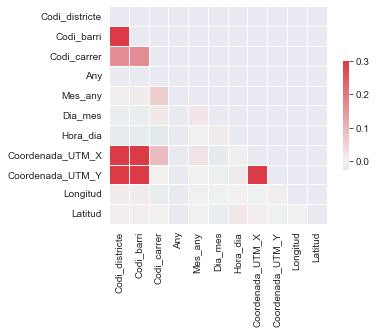

In [177]:
sns.heatmap(corr, mask=mask, cmap=colorMap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Comprobar nombres de los campos del geoframe

In [178]:
gdf.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal_caption',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Descripcio_tipus_accident', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud', 'geometry'],
      dtype='object')

# Importar API Statsmodel

In [179]:
import statsmodels.formula.api as smf

# Modelo ajustado en una línea

In [180]:
##Cantidad de a
lm = smf.ols(formula='')

TypeError: from_formula() missing 1 required positional argument: 'data'